In [1]:
from array import array
from cmath import nan
from pyexpat import model
import statistics
from tkinter.ttk import Separator
import numpy as np
import pandas as pd
import os

In [2]:
variants_full = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC3/variants_full.csv')
tb_100k = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC3/tb100k.20250408.csv')

/tmp/ipykernel_35329/960879385.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  tb_100k = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC3/tb100k.20250408.csv')


In [3]:
df_ = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC3/CRyPTIC_reuse_table_20231208_cleaned+tbprofiler.csv')

In [4]:
df_

,Unnamed: 0,ENA_RUN,UNIQUEID,AMI_BINARY_PHENOTYPE,BDQ_BINARY_PHENOTYPE,CFZ_BINARY_PHENOTYPE,DLM_BINARY_PHENOTYPE,EMB_BINARY_PHENOTYPE,ETH_BINARY_PHENOTYPE,INH_BINARY_PHENOTYPE,...,clofazimine,delamanid,ethambutol,ethionamide,isoniazid,kanamycin,levofloxacin,linezolid,moxifloxacin,rifampicin
0,0,ERR4810489,site.02.subj.0001.lab.2014222001.iso.1,S,NaN,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
1,1,ERR4810491,site.02.subj.0002.lab.2014222005.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
2,2,ERR4810493,site.02.subj.0004.lab.2014222010.iso.1,S,S,S,NaN,S,I,S,...,0,0,0,0,0,0,0,0,0,0
3,3,ERR4810494,site.02.subj.0005.lab.2014222011.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
4,4,ERR4810495,site.02.subj.0006.lab.2014222013.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12282,12282,ERR8699231,site.20.subj.SCH8604398.lab.YA00134621.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
12283,12283,ERR8699764,site.20.subj.SCH8604399.lab.YA00134971.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0
12284,12284,ERR8699789,site.20.subj.SCH8608291.lab.YA00135762.iso.1,S,S,S,S,R,R,R,...,0,0,1,1,1,0,1,0,1,1
12285,12285,ERR8699232,site.20.subj.SCH8608295.lab.YA00134623.iso.1,S,S,S,S,S,S,S,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_ = df_[['AMI_MIC', 'BDQ_MIC', 'CFZ_MIC', 'DLM_MIC', 'EMB_MIC', 'ETH_MIC',
       'INH_MIC', 'KAN_MIC', 'LEV_MIC', 'LZD_MIC', 'MXF_MIC', 'RIF_MIC',
       ]]

df_.columns = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH',
               'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF']


In [6]:
np.linspace(global_min, global_max, n_bins + 1)

NameError: name 'global_min' is not defined

In [7]:
norm 

NameError: name 'norm' is not defined

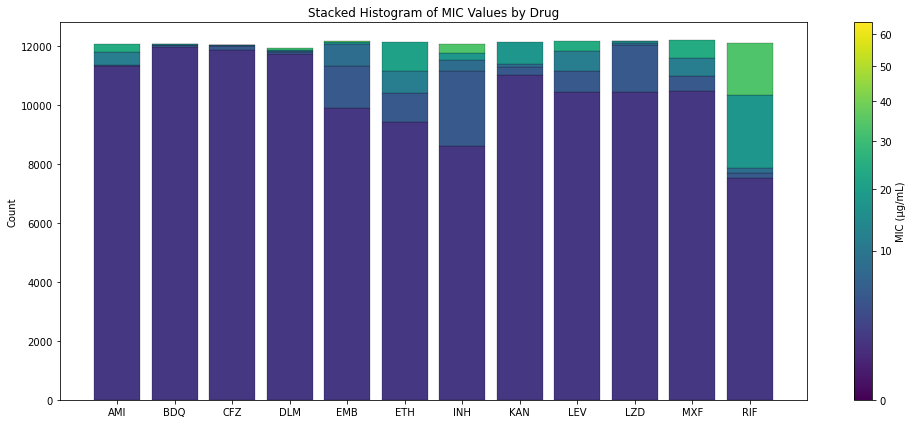

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors


# Your columns
mic_cols = ['AMI', 'BDQ', 'CFZ', 'DLM', 'EMB', 'ETH',
            'INH', 'KAN', 'LEV', 'LZD', 'MXF', 'RIF']

mic_cols = [c for c in mic_cols if c in df_.columns]

# Flatten all values for global color scale
all_vals = pd.concat([df_[c].dropna().astype(float) for c in mic_cols], axis=0)
global_min, global_max = all_vals.min(), all_vals.max()

# Bin edges shared across all columns
n_bins = 20
bin_edges = np.linspace(global_min, global_max, n_bins + 1)
bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

cmap = plt.cm.viridis
norm = plt.Normalize(vmin=global_min, vmax=global_max)
norm = colors.PowerNorm(gamma=0.5, vmin=global_min, vmax=global_max)  # gamma<1 boosts contrast

fig, ax = plt.subplots(figsize=(14, 6))

# Iterate through columns and build stacked bars
bar_positions = np.arange(len(mic_cols))
width = 0.8

for idx, col in enumerate(mic_cols):
    data = df_[col].dropna().astype(float).values
    counts, _ = np.histogram(data, bins=len(np.unique(data)))

    bottom = 0
    for count, center in zip(counts, bin_centers):
        if count > 0:
            ax.bar(idx, count, bottom=bottom, width=width,
                   color=cmap(norm(center)), edgecolor='black', linewidth=0.2)
            bottom += count

# Axis formatting
ax.set_xticks(bar_positions)
ax.set_xticklabels(mic_cols, rotation=0)
ax.set_ylabel("Count")
ax.set_title("Stacked Histogram of MIC Values by Drug")

# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("MIC (µg/mL)")

plt.tight_layout()
plt.show()


[6889 3427  583   88   33   31  687]


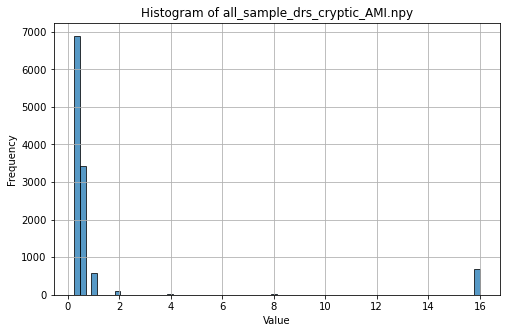

[9780 2080]


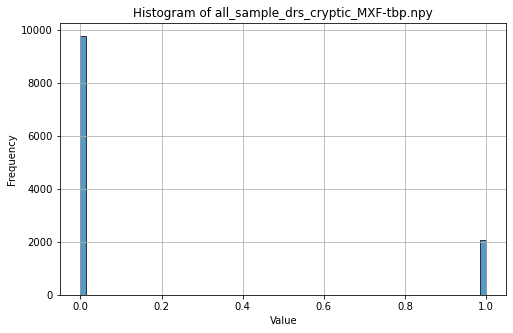

[8023 3800]


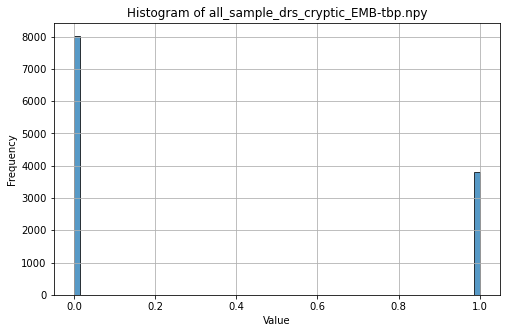

[4328 2087  717  185  114  149  161 4028]


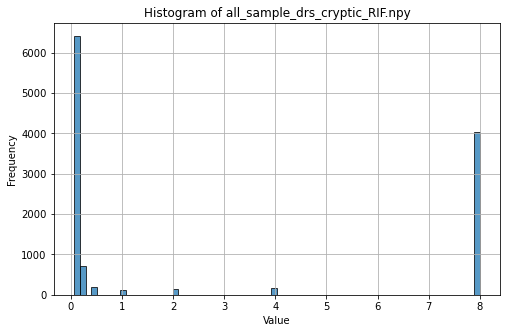

[11493   250]


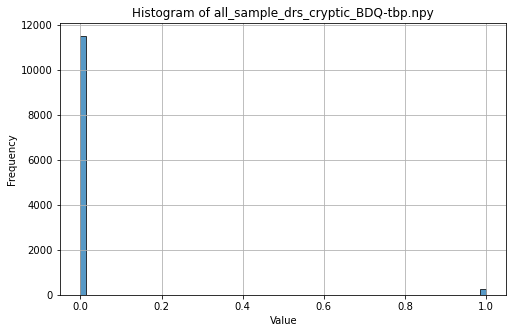

[ 261 1820 4390 2820  910  708  891]


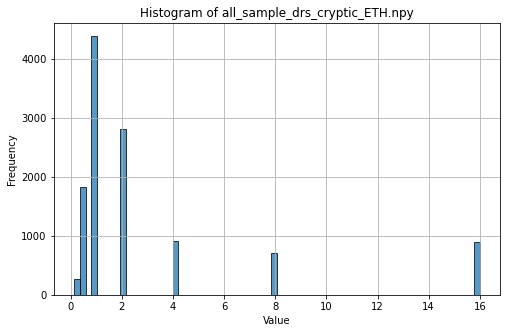

[6994 4775]


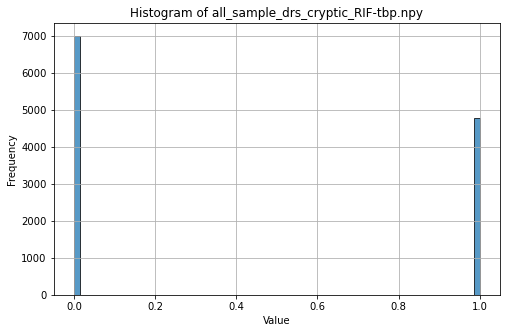

[6186 5550]


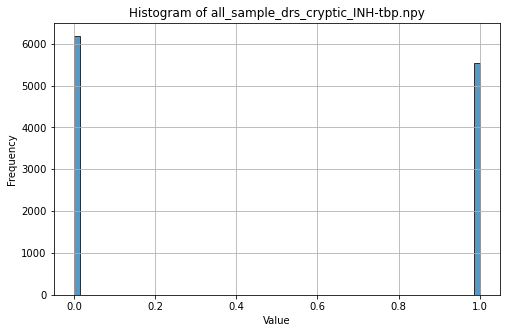

[118176   5472]
[58351 35613]
[7921]
[11474   244]


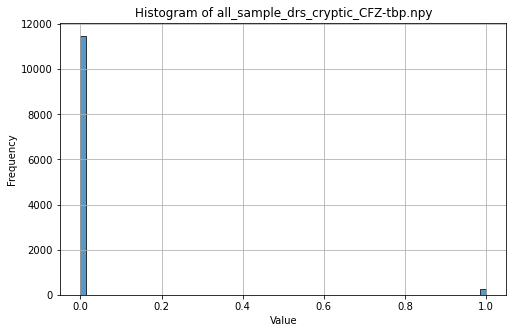

[11680]
[9143 2657]


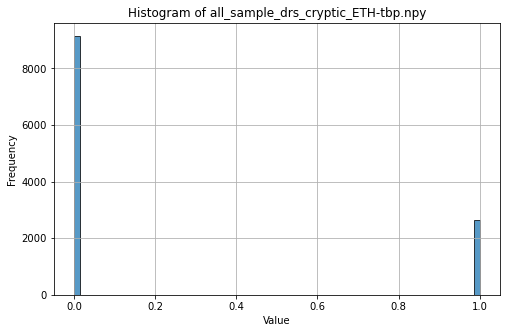

[4481 1338 5358  234   53   40   90]


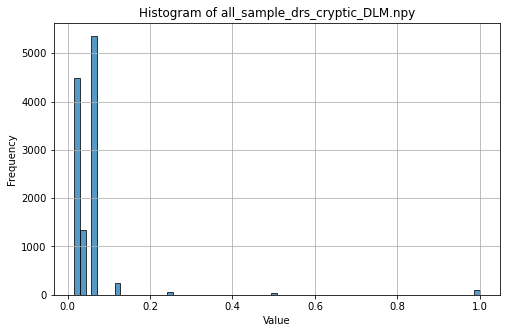

[122879    828]
[9742 2087]


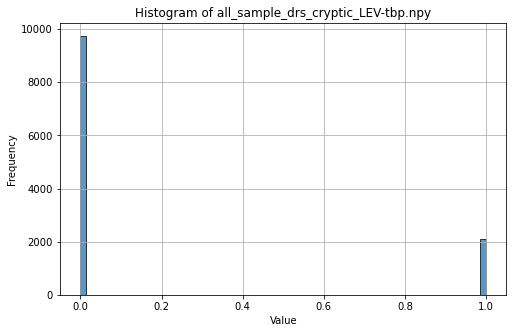

[ 949 2143 3979 2645  557  467  580  540]


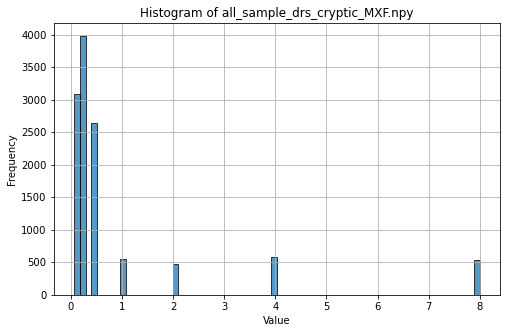

[2027  196]
[110738  12018]
[10675  1122]


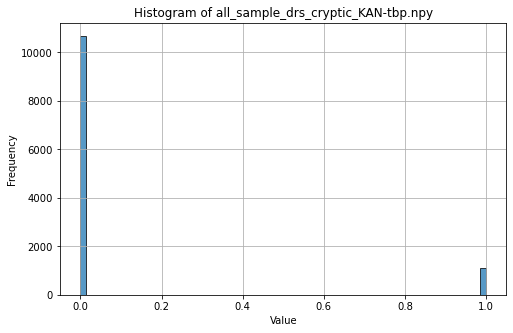

[50265   202]
[10901   837]


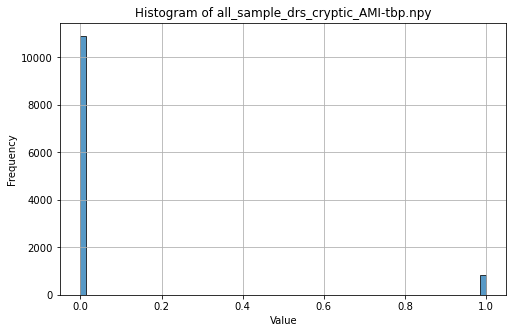

[11561    33]


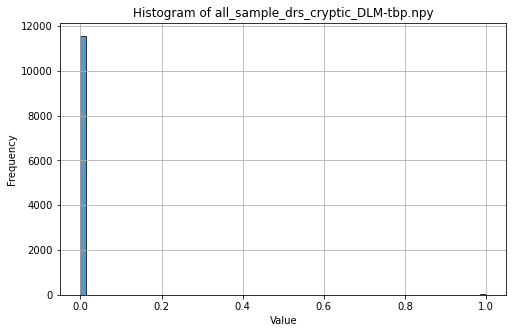

[66534 35279]
[110776  12011]
[ 165 1117 3968 2957 1493 1366  757]


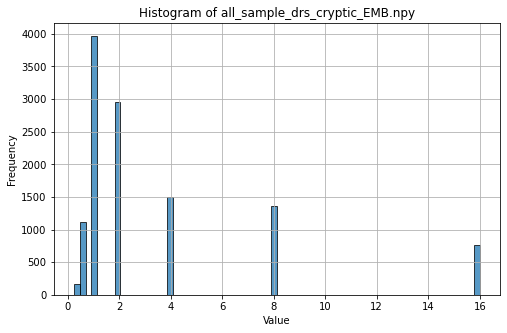

[ 987 1837 4030 3763  783  242   63   24   14]


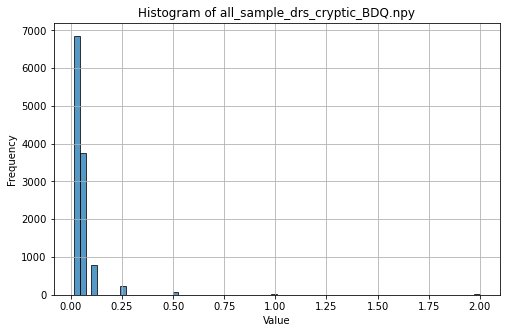

[7323 2680 1192  337  126   37   23]


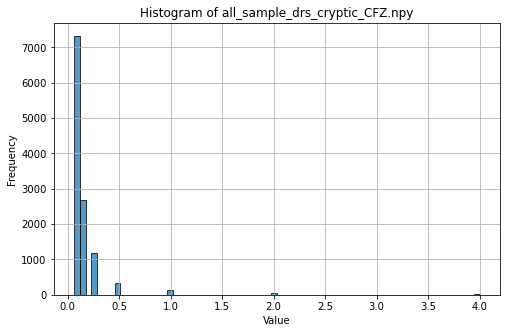

[3453 5650 1643  247   98  706]


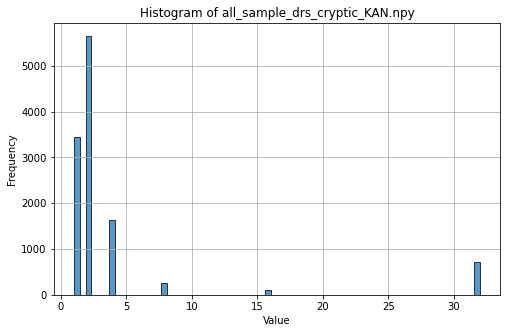

[2431 3386  272  362  305  344 1382 2919  335]


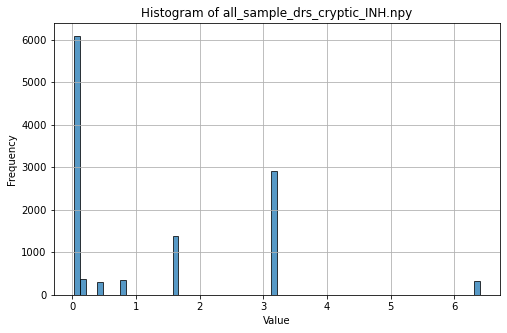

[94388 27906]
[ 121  181  827 3182 5801 1589   74   79]


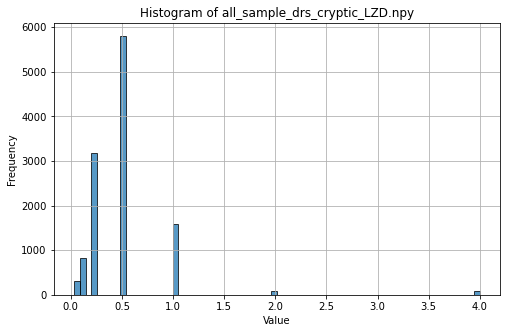

[11791    63]


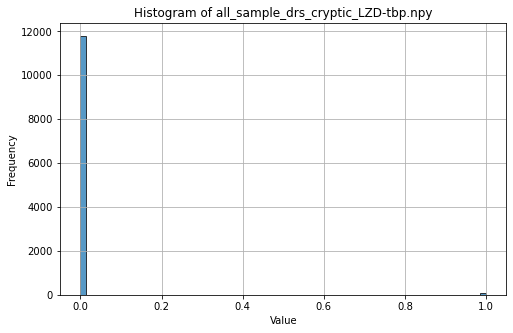

[22427 11313]
[ 429 3056 5570  788  396  653  652  285]


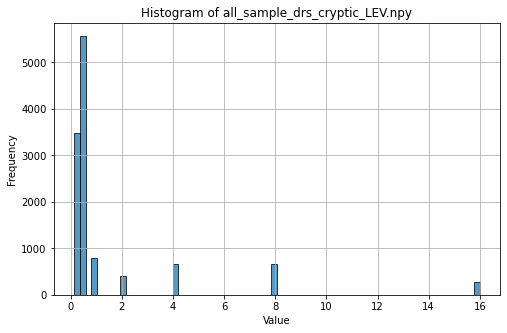

                        file_name    0.25     0.5     1.0     2.0     4.0  \
0  all_sample_drs_cryptic_AMI.npy  6889.0  3427.0   583.0    88.0    33.0   
1  all_sample_drs_cryptic_RIF.npy   717.0   185.0   114.0   149.0   161.0   
2  all_sample_drs_cryptic_DLM.npy    53.0    40.0    90.0     0.0     0.0   
3  all_sample_drs_cryptic_MXF.npy  3979.0  2645.0   557.0   467.0   580.0   
4  all_sample_drs_cryptic_EMB.npy   165.0  1117.0  3968.0  2957.0  1493.0   

      8.0   16.0  0.0  0.0625  ...  0.1  0.2  0.4  0.8  1.6  3.2  6.4  \
0    31.0  687.0  0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  4028.0    0.0  0.0  4328.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2     0.0    0.0  0.0  5358.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   540.0    0.0  0.0   949.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  1366.0  757.0  0.0     0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   shannon_index  num_classes  max_entropy  
0       1.523948            7     2.807355  
1       

In [9]:
# Re-import necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path
directory = "/mnt/storageG1/lwang/Projects/tb_dr_MIC3/individual_models/generated_data18122024"

# Get all files in the directory containing 'drs'
try:
    files = [f for f in os.listdir(directory) if 'drs' in f and f.endswith('.npy')]
except FileNotFoundError:
    print("Directory not found. Please check the path.")
    files = []

# Initialize a dictionary to store value counts
imba_ratio = []
shannon_indices = []
value_counts_dict = {}
num_classes_list = []
max_entropy_list = []
file_names = []

# Process each file
for file in files:
    file_path = os.path.join(directory, file)
    
    # Load the .npy file
    try:
        data = np.load(file_path)
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue
    
    # Compute value counts
    unique_values, counts = np.unique(data, return_counts=True)
    value_counts_dict[file] = dict(zip(unique_values, counts))
    print(counts)
    
    
#     imbalance_ratio = max(counts) / min(counts)
#     imba_ratio.append(imbalance_ratio)

    
#     # If 'cryptic' is in the filename, generate a histogram
#     if 'cryptic' in file:
#         plt.figure(figsize=(8, 5))
#         plt.hist(data, bins=70, edgecolor='black', alpha=0.75)
#         plt.xlabel("Value")
#         plt.ylabel("Frequency")
#         plt.title(f"Histogram of {file}")
#         plt.grid(True)
#         plt.show()

# # Convert value counts to a DataFrame for better readability
# df_value_counts = pd.DataFrame.from_dict(value_counts_dict, orient='index').fillna(0)
# df_value_counts['imbalance_ratio'] = imba_ratio
    proportions = counts / counts.sum()
    shannon_index = -np.sum(proportions * np.log2(proportions))
    shannon_indices.append(shannon_index)
    
    num_classes = len(unique_values)
    max_entropy = np.log2(num_classes) if num_classes > 1 else 0
    num_classes_list.append(num_classes)
    max_entropy_list.append(max_entropy)
    file_names.append(file)
    
    # Optional plot
    if 'cryptic' in file:
        plt.figure(figsize=(8, 5))
        plt.hist(data, bins=70, edgecolor='black', alpha=0.75)
        plt.xlabel("Value")
        plt.ylabel("Frequency")
        plt.title(f"Histogram of {file}")
        plt.grid(True)
        plt.show()

# Convert value counts to DataFrame and append summary stats
df_value_counts = pd.DataFrame.from_dict(value_counts_dict, orient='index').fillna(0)
df_value_counts['shannon_index'] = shannon_indices
df_value_counts['num_classes'] = num_classes_list
df_value_counts['max_entropy'] = max_entropy_list
df_value_counts.index.name = 'file_name'
df_value_counts.reset_index(inplace=True)

# Preview
print(df_value_counts.head())
# Display the DataFrame
# print(df_value_counts)


In [11]:
df_value_counts.columns

Index([    'file_name',            0.25,             0.5,             1.0,
                   2.0,             4.0,             8.0,            16.0,
                   0.0,          0.0625,           0.125,        0.015625,
               0.03125,           0.015,            32.0,           0.025,
                  0.05,             0.1,             0.2,             0.4,
                   0.8,             1.6,             3.2,             6.4,
       'shannon_index',   'num_classes',   'max_entropy'],
      dtype='object')

In [12]:
df_value_counts

,file_name,0.25,0.5,1.0,2.0,4.0,8.0,16.0,0.0,0.0625,...,0.1,0.2,0.4,0.8,1.6,3.2,6.4,shannon_index,num_classes,max_entropy
0,all_sample_drs_cryptic_AMI.npy,6889.0,3427.0,583.0,88.0,33.0,31.0,687.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.523948,7,2.807355
1,all_sample_drs_cryptic_RIF.npy,717.0,185.0,114.0,149.0,161.0,4028.0,0.0,0.0,4328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669864,2,1.000000
2,all_sample_drs_cryptic_DLM.npy,53.0,40.0,90.0,0.0,0.0,0.0,0.0,0.0,5358.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905905,2,1.000000
3,all_sample_drs_cryptic_MXF.npy,3979.0,2645.0,557.0,467.0,580.0,540.0,0.0,0.0,949.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.072109,8,3.000000
4,all_sample_drs_cryptic_EMB.npy,165.0,1117.0,3968.0,2957.0,1493.0,1366.0,757.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148620,2,1.000000
5,all_sample_drs_cryptic_BDQ.npy,242.0,63.0,24.0,14.0,0.0,0.0,0.0,0.0,3763.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.371834,7,2.807355
6,all_sample_drs_cryptic_CFZ.npy,1192.0,337.0,126.0,37.0,23.0,0.0,0.0,0.0,7323.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974202,2,1.000000
7,all_sample_drs_cryptic_LZD.npy,3182.0,5801.0,1589.0,74.0,79.0,0.0,0.0,0.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997881,2,1.000000
8,all_sample_drs_cryptic_LEV.npy,3056.0,5570.0,788.0,396.0,653.0,652.0,285.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261471,2,1.000000
9,all_sample_drs_cryptic_ETH.npy,0.0,1820.0,4390.0,2820.0,910.0,708.0,891.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.957338,2,1.000000


In [19]:
df_value_counts.index

RangeIndex(start=0, stop=36, step=1)

In [20]:
df_value_counts.file_name

0         all_sample_drs_cryptic_AMI.npy
1         all_sample_drs_cryptic_RIF.npy
2         all_sample_drs_cryptic_DLM.npy
3         all_sample_drs_cryptic_MXF.npy
4         all_sample_drs_cryptic_EMB.npy
5         all_sample_drs_cryptic_BDQ.npy
6         all_sample_drs_cryptic_CFZ.npy
7         all_sample_drs_cryptic_LZD.npy
8         all_sample_drs_cryptic_LEV.npy
9         all_sample_drs_cryptic_ETH.npy
10    all_sample_drs_cryptic_MXF-tbp.npy
11    all_sample_drs_cryptic_EMB-tbp.npy
12    all_sample_drs_cryptic_BDQ-tbp.npy
13    all_sample_drs_cryptic_RIF-tbp.npy
14    all_sample_drs_cryptic_INH-tbp.npy
15            all_sample_drs_50k_KAN.npy
16            all_sample_drs_50k_INH.npy
17    all_sample_drs_cryptic_CFZ-tbp.npy
18    all_sample_drs_cryptic_ETH-tbp.npy
19            all_sample_drs_50k_AMI.npy
20    all_sample_drs_cryptic_LEV-tbp.npy
21            all_sample_drs_50k_LZD.npy
22            all_sample_drs_50k_MXF.npy
23    all_sample_drs_cryptic_KAN-tbp.npy
24            al

In [21]:

# Extract row names that contain '50k'
filtered_rows = df_value_counts[df_value_counts.file_name.str.contains("50k", na=False)]

# Display the filtered rows
filtered_rows[[0,1]]


,0.0,1.0
15,118176.0,5472.0
16,58351.0,35613.0
19,122879.0,828.0
21,2027.0,196.0
22,110738.0,12018.0
24,50265.0,202.0
27,66534.0,35279.0
28,110776.0,12011.0
30,94388.0,27906.0
32,22427.0,11313.0


In [14]:
csv_dr = pd.read_csv('/mnt/storageG1/lwang/Projects/tb_dr_MIC_v2/variants_full.csv')

In [22]:
csv_dr['drugs'].value_counts()


drugs
rifampicin                                                            45130
isoniazid                                                             42775
streptomycin                                                          41550
ethambutol                                                            37720
pyrazinamide                                                          31071
isoniazid,ethionamide                                                 17190
ofloxacin,moxifloxacin,levofloxacin,fluoroquinolones,ciprofloxacin    15606
ethionamide                                                            8262
kanamycin,capreomycin,aminoglycosides,amikacin                         7833
ethionamide,ethionamide                                                5214
kanamycin                                                              4866
para-aminosalicylic_acid                                               3694
pyrazinamide,pyrazinamide                                              2712
cyclos

In [24]:
filtered_cryptic_rows = df_value_counts[
    df_value_counts.file_name.str.contains("cryptic", na=False) &
    ~df_value_counts.file_name.str.contains("tbp", na=False)
]


In [25]:
filtered_cryptic_rows

,file_name,0.25,0.5,1.0,2.0,4.0,8.0,16.0,0.0,0.0625,...,0.1,0.2,0.4,0.8,1.6,3.2,6.4,shannon_index,num_classes,max_entropy
0,all_sample_drs_cryptic_AMI.npy,6889.0,3427.0,583.0,88.0,33.0,31.0,687.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.523948,7,2.807355
1,all_sample_drs_cryptic_RIF.npy,717.0,185.0,114.0,149.0,161.0,4028.0,0.0,0.0,4328.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.669864,2,1.000000
2,all_sample_drs_cryptic_DLM.npy,53.0,40.0,90.0,0.0,0.0,0.0,0.0,0.0,5358.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.905905,2,1.000000
3,all_sample_drs_cryptic_MXF.npy,3979.0,2645.0,557.0,467.0,580.0,540.0,0.0,0.0,949.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.072109,8,3.000000
4,all_sample_drs_cryptic_EMB.npy,165.0,1117.0,3968.0,2957.0,1493.0,1366.0,757.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.148620,2,1.000000
5,all_sample_drs_cryptic_BDQ.npy,242.0,63.0,24.0,14.0,0.0,0.0,0.0,0.0,3763.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.371834,7,2.807355
6,all_sample_drs_cryptic_CFZ.npy,1192.0,337.0,126.0,37.0,23.0,0.0,0.0,0.0,7323.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.974202,2,1.000000
7,all_sample_drs_cryptic_LZD.npy,3182.0,5801.0,1589.0,74.0,79.0,0.0,0.0,0.0,181.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.997881,2,1.000000
8,all_sample_drs_cryptic_LEV.npy,3056.0,5570.0,788.0,396.0,653.0,652.0,285.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.261471,2,1.000000
9,all_sample_drs_cryptic_ETH.npy,0.0,1820.0,4390.0,2820.0,910.0,708.0,891.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.957338,2,1.000000


In [ ]:
import pandas as pd

# Load the dataframe (assumed already formatted as described)
df = filtered_cryptic_rows

# ECOFF thresholds (resistance >= this value)
ecoff_thresholds = {
    "AMI": 1,
    "RIF": 0.5,
    "DLM": 0.12,
    "MXF": 1,
    "EMB": 4,
    "BDQ": 0.25,
    "CFZ": 0.25,
    "LZD": 1,
    "LEV": 1,
    "ETH": 4,
    "KAN": 4,
    "INH": 0.1,
    "RFB": 0.12,
}

# Convert column headers (MICs) to floats for comparison
# df.columns = df.columns[:-1].astype(float).tolist() + ['imbalance_ratio']
df.columns = df.columns[:-1].tolist() + ['imbalance_ratio']

# Prepare result dataframe
result_rows = []

# Process each row (each drug)
for index, row in df.iterrows():
    # Extract drug name from file name
    # drug = df_value_counts.file_name.replace("all_sample_drs_cryptic_", "").replace("-tbp", "").replace(".npy", "")#.upper()
    # print(row)
    drug = (
    row['file_name']
    .replace("all_sample_drs_cryptic_", "")
    .replace("-tbp", "")
    .replace(".npy", "")
    )
    
    # print(drug)
    # print('------') 
    
    if drug not in ecoff_thresholds:
        continue
    
    threshold = ecoff_thresholds[drug]
    mic_counts = row.drop(['file_name', "imbalance_ratio", 'shannon_index', 'num_classes'])
    
    # MIC column headers
    mic_values = mic_counts.index.astype(float)
    susceptible = mic_counts[mic_values < threshold].sum()
    resistant = mic_counts[mic_values >= threshold].sum()
    
    result_rows.append({"Drug": drug, "Susceptible": susceptible, "Resistant": resistant})

result_df = pd.DataFrame(result_rows).sort_values("Drug").reset_index(drop=True)

result_df['Binary imbalance'] = result_df['Resistant'] / result_df['Susceptible']

AMI
------
RIF
------
DLM
------
MXF
------
EMB
------
BDQ
------
CFZ
------
LZD
------
LEV
------
ETH
------
KAN
------
INH
------


In [59]:
row['file_name']

'all_sample_drs_cryptic_AMI.npy'

## cryptic data size histogram


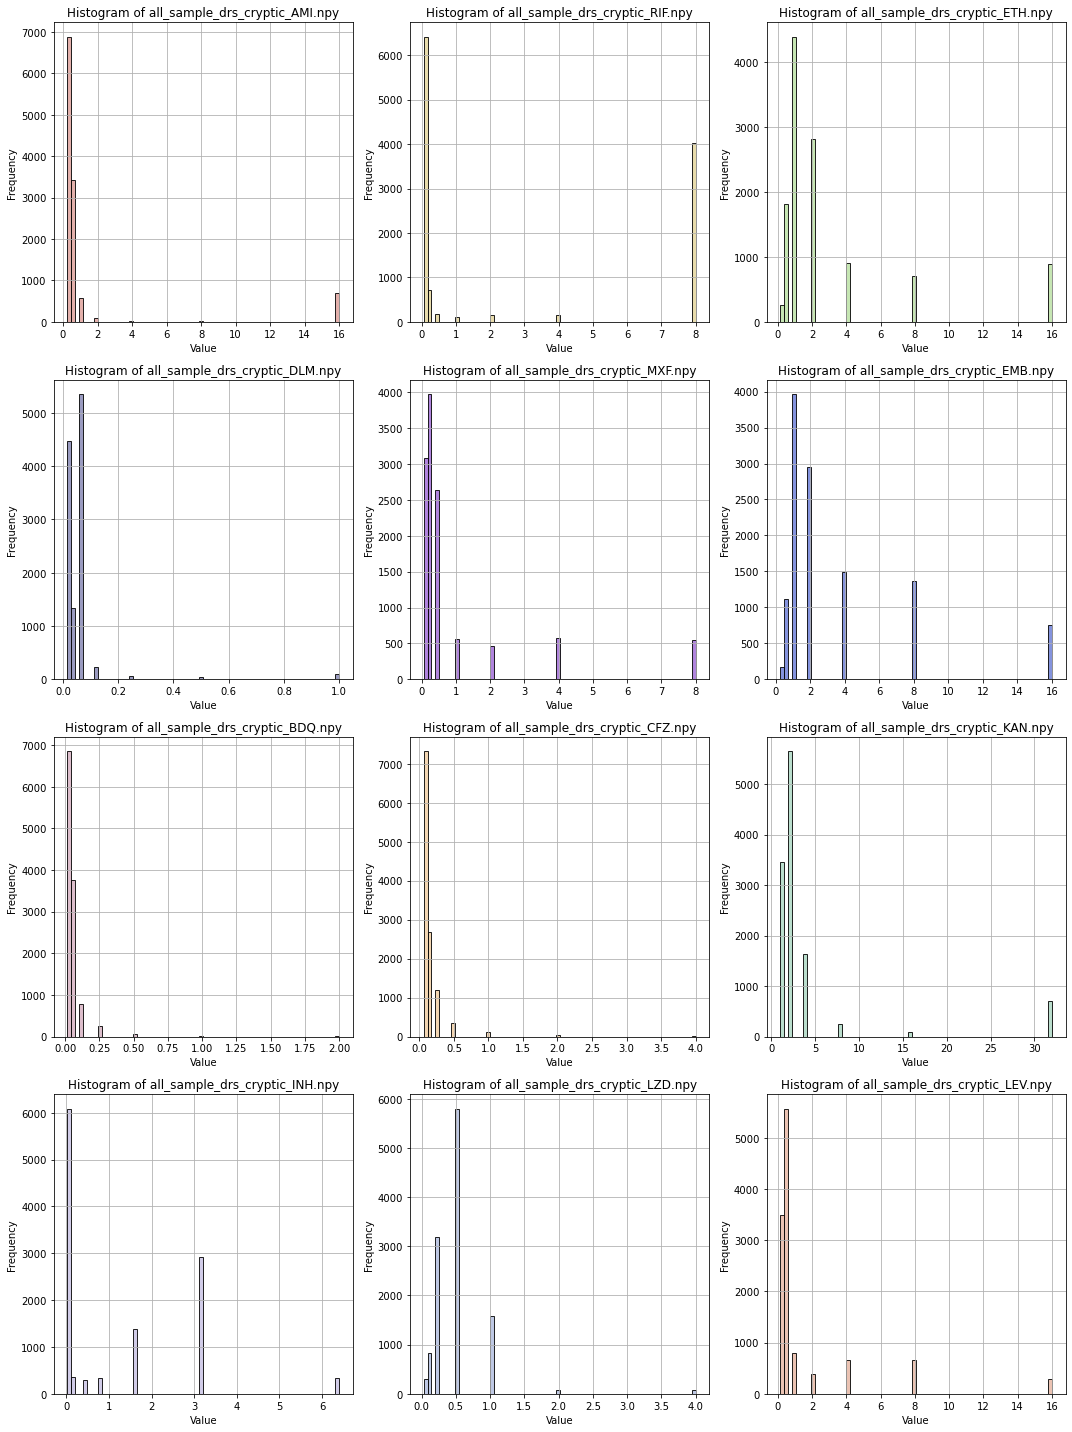

In [65]:
# Re-import necessary libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path
directory = "/mnt/storageG1/lwang/Projects/tb_dr_MIC3/individual_models/generated_data18122024"

# Get all files in the directory containing 'drs'
try:
    files = [f for f in os.listdir(directory) if 'drs' in f and f.endswith('.npy')]
    files = [f for f in files if 'cryptic' in f]
    files = [f for f in files if 'tbp' not in f]
except FileNotFoundError:
    print("Directory not found. Please check the path.")
    files = []

# Define a distinct color palette (12 colors)
color_palette = [
    "#dfa39d", "#e4d69e", "#bce2a6", "#898ab5", "#a36ed8", "#6e80d8",
    "#d8b3c4", "#f2cfa5", "#aed9c5", "#c9c4e4", "#b3bfe0", "#e8b9a6"
]

# Initialize a dictionary to store value counts
value_counts_dict = {}
imba_ratio = []

# Set the number of columns for subplots
n_col = 3
n_row = (len(files) + n_col - 1) // n_col  # Calculate the number of rows needed

# Create subplots
fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15, n_row * 5))
axes = axes.flatten()

# Process each file and plot in subplots
for i, (ax, file) in enumerate(zip(axes, files)):
    file_path = os.path.join(directory, file)
    
    # Load the .npy file
    try:
        data = np.load(file_path)
    except Exception as e:
        print(f"Error loading {file}: {e}")
        continue
    
    # Compute value counts
    unique_values, counts = np.unique(data, return_counts=True)
    value_counts_dict[file] = dict(zip(unique_values, counts))
    imbalance_ratio = max(counts) / min(counts)
    imba_ratio.append(imbalance_ratio)
    
    # Plot histogram with a unique color
    color = color_palette[i % len(color_palette)]
    ax.hist(data, bins=70, edgecolor='black', alpha=0.85, color=color)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")
    ax.set_title(f"Histogram of {file}")
    ax.grid(True)

# Hide any unused subplots
for ax in axes[len(files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Convert value counts to a DataFrame for better readability
df_value_counts = pd.DataFrame.from_dict(value_counts_dict, orient='index').fillna(0)


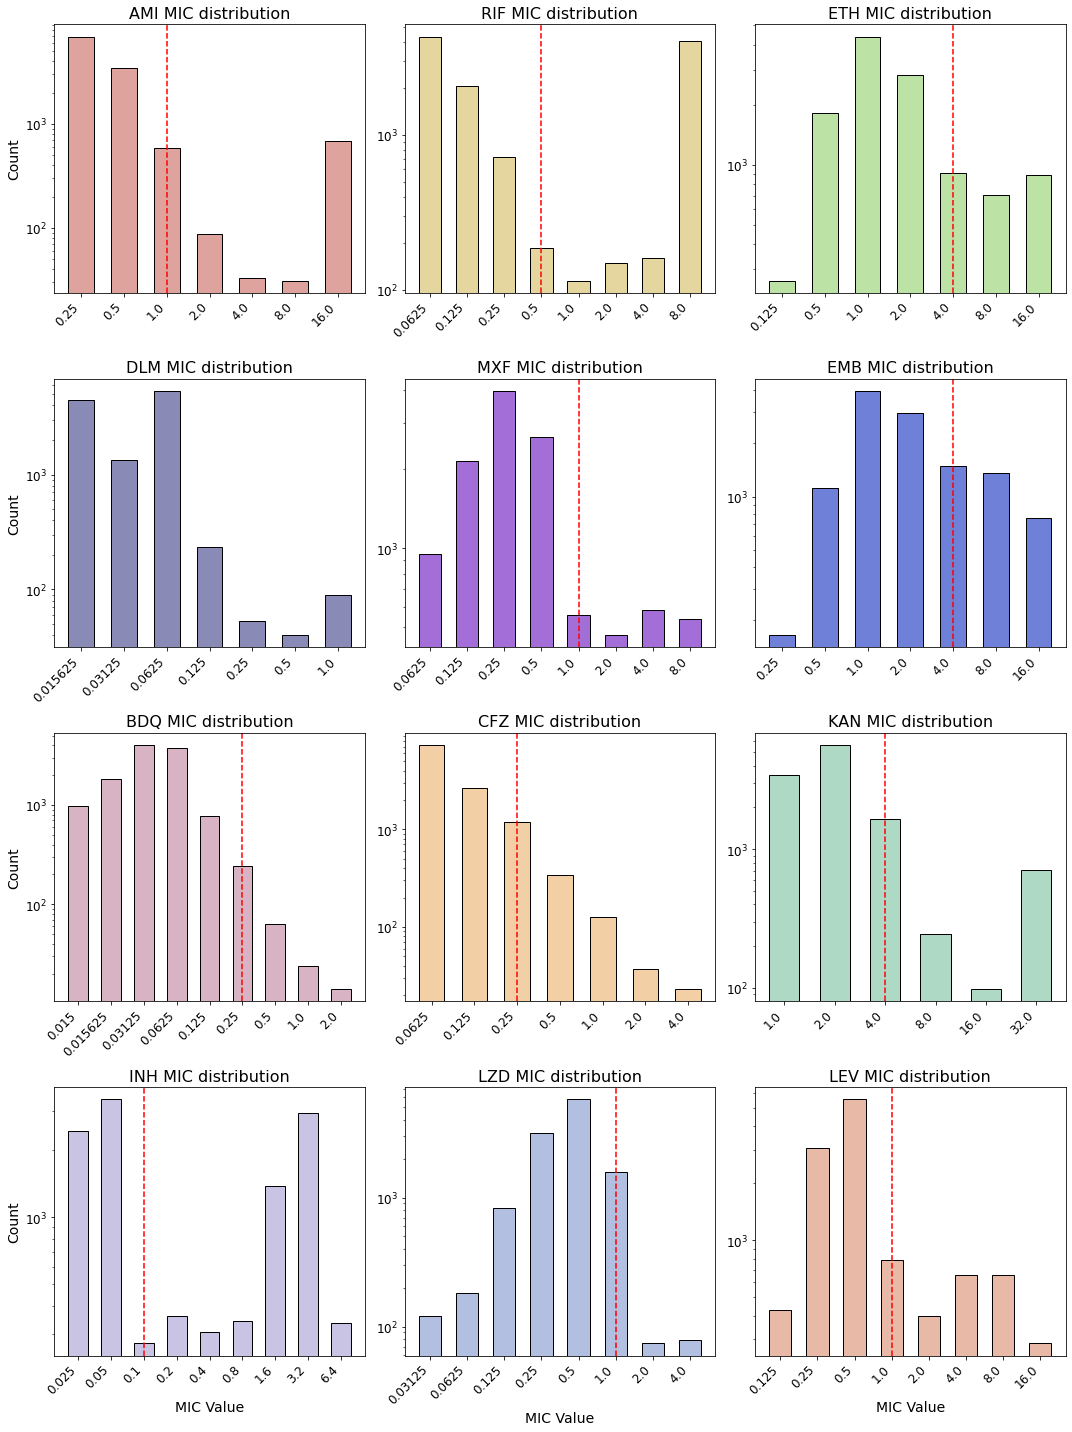

In [75]:
# Re-importing libraries after kernel reset
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

# Define the directory path
directory = "/mnt/storageG1/lwang/Projects/tb_dr_MIC3/individual_models/generated_data18122024"


# Define the resistance thresholds
resistance_thresholds = {
    "AMI": 1,
    "RIF": 0.5,
    "DLM": 0.12,
    "MXF": 1,
    "EMB": 4,
    "BDQ": 0.25,
    "CFZ": 0.25,
    "LZD": 1,
    "LEV": 1,
    "ETH": 4,
    "KAN": 4,
    "INH": 0.1,
}

# Get all files in the directory containing 'drs'
try:
    files = [f for f in os.listdir(directory) if 'drs' in f and f.endswith('.npy')]
    files = [f for f in files if 'cryptic' in f]
    files = [f for f in files if 'tbp' not in f]
except FileNotFoundError:
    files = []

# Define a distinct color palette (12 colors)
color_palette = [
    "#dfa39d", "#e4d69e", "#bce2a6", "#898ab5", "#a36ed8", "#6e80d8",
    "#d8b3c4", "#f2cfa5", "#aed9c5", "#c9c4e4", "#b3bfe0", "#e8b9a6"
]

# Initialize a dictionary to store value counts
value_counts_dict = {}
imba_ratio = []
# Set the number of columns for subplots
n_col = 3
n_row = (len(files) + n_col - 1) // n_col

fig, axes = plt.subplots(nrows=n_row, ncols=n_col, figsize=(15, n_row * 5))
axes = axes.flatten()

for i, (ax, file) in enumerate(zip(axes, files)):
    file_path = os.path.join(directory, file)

    try:
        data = np.load(file_path)
    except Exception:
        continue

    # exact MIC bins
    unique_values, counts = np.unique(data, return_counts=True)
    labels = [str(v) for v in unique_values]
    x_pos = np.arange(len(unique_values))

    value_counts_dict[file] = dict(zip(unique_values, counts))
    imbalance_ratio = max(counts) / min(counts)
    imba_ratio.append(imbalance_ratio)

    color = color_palette[i % len(color_palette)]

    # bar plot
    ax.bar(x_pos, counts, width=0.6, color=color, edgecolor='black', alpha=1.0)

    # log y axis
    ax.set_yscale('log')

    # tick labels
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=12)
    ax.tick_params(axis='y', labelsize=12)

    # axis labels with bigger font
    if i // n_col == n_row - 1:
        ax.set_xlabel("MIC Value", fontsize=14)

    if i % n_col == 0:
        ax.set_ylabel("Count", fontsize=14)

    # subplot title with bigger font
    file_clean = (
        file.replace("all_sample_drs_cryptic_", "")
            .replace("-tbp", "")
            .replace(".npy", "")
    )
    ax.set_title(f"{file_clean} MIC distribution", fontsize=16)

    ax.grid(False)

    # ECOFF line
    for drug in resistance_thresholds:
        if drug.lower() in file_clean.lower():
            if resistance_thresholds[drug] in unique_values:
                idx = np.where(unique_values == resistance_thresholds[drug])[0][0]
                ax.axvline(x=idx, color='red', linestyle='--', linewidth=1.5)
            break

# Hide any unused subplots
for ax in axes[len(files):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [71]:
unique_values

array([ 0.125,  0.25 ,  0.5  ,  1.   ,  2.   ,  4.   ,  8.   , 16.   ])